In [1]:
import pandas as pd
import csv # 打开csv文件
import jieba # 中文分词
import wordcloud # 词云图绘制
from PIL import Image # 用于打开词云背景图片
import numpy as np # 用于将图片转化为数组

In [3]:
with open('/content/sample_data/长相思纯评论内容.csv','r',encoding='utf-8') as f:
    danmus_list=list(csv.reader(f))
# print(type(danmus_list))

In [4]:
danmus_clean1=[str(danmus_list).replace(' ','')]
# print(danmus_clean1)

In [5]:
danmus_seg=''.join(danmus_clean1) # 将文本数据转换为字符串格式
words=list(jieba.lcut(danmus_seg)) # 利用jieba库进行分词
print(type(words),words)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.892 seconds.
DEBUG:jieba:Loading model cost 0.892 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
danmus_clean2 = [word for word in words if len(word)>1] # 保留长度>1的变量
print(danmus_clean2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
with open('/content/sample_data/cn_stopwords.txt','r',encoding='utf-8') as sw:
    stopwords_list=list(csv.reader(sw)) # 打开停用词表并转换为列表格式
outstr='' # 设置空字符串，用于储存停用词表过滤后的分词
for word in danmus_clean2: # 遍历分词后列表中的每一个单词
    if word not in stopwords_list: # 如果单词不在停用词表中
        if word != '\t': # 如果单词不为制表符
            outstr += word # 将该单词加入字符串中
            outstr += ' ' # 将结果以空格隔开
result=outstr.split() # 将结果转换为list格式
print(type(result),result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
wordsDict = {} #新建字典用于储存词及词频
for word in words:
    if len(word) == 1: #单个的字符不作为词放入字典
        continue
    else:
        wordsDict.setdefault(word, 0) #设置词的初始出现次数为0
        wordsDict[word] +=1 #对于重复出现的词，每出现一次，次数增加1

wordsDict_seq = sorted(wordsDict.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_seq[:100]

[('相思', 128275),
 ('杨紫', 65519),
 ('杨紫小夭', 43057),
 ('杨紫长', 37284),
 ('作者', 33332),
 ('抱歉', 33204),
 ('可见', 33175),
 ('设置', 33126),
 ('此微博', 33077),
 ('展示', 32999),
 ('半年', 32993),
 ('内微博', 32975),
 ('小夭', 29592),
 ('##', 27367),
 ('杨紫超话', 26785),
 ('视频', 24564),
 ('微博', 23955),
 ('邓为', 19872),
 ('檀健次', 16149),
 ('yz', 16017),
 ('杨紫玟', 15081),
 ('相柳', 14417),
 ('超话', 13689),
 ('涂山', 8857),
 ('电视剧', 7709),
 ('工作室', 7668),
 ('收起', 7565),
 ('真的', 7479),
 ('自己', 7174),
 ('大家', 6132),
 ('次长', 6094),
 ('檀健', 6072),
 ('一个', 5139),
 ('今日', 5081),
 ('承欢', 5034),
 ('喜欢', 4994),
 ('今晚', 4760),
 ('dw', 4343),
 ('没有', 4275),
 ('JC', 4164),
 ('黄瀛子', 4149),
 ('骆佳', 4123),
 ('MIC', 4026),
 ('演技', 3993),
 ('张晚', 3851),
 ('大荒', 3783),
 ('我们', 3730),
 ('清水', 3726),
 ('猎毒', 3699),
 ('角色', 3673),
 ('就是', 3671),
 ('评分', 3356),
 ('电影', 3298),
 ('演员', 3287),
 ('王姬', 3258),
 ('好看', 3232),
 ('今天', 3229),
 ('久久', 3005),
 ('期待', 3001),
 ('相见', 2978),
 ('可以', 2966),
 ('这个', 2944),
 ('什么', 2702),
 ('开播', 2702),
 ('

In [16]:
stopWords = ["相思","杨紫长","抱歉","可见","设置","此微博","展示","半年","内微博","##","杨紫超话","视频","微博","杨紫玟","超话","电视剧","工作室","真的","自己","各位","不会","杨紫麦","小夭来","199","大家","次长","三成","但是","檀建","一个","今日","今晚","没有","MIC","张晚","我们","就是","今天","久久","清水","猎毒","收起","觉得","看到","特别","很多","一部","有些","几个","还有","虽然","一直","其实","这种","那么","实在","这部","因为","一点","比较","可能","非常","可以","这个","什么","而且","一起","不是","知道","看到","不能","一下","杨紫杨","还是","这么","c#","一段","一些","这样","现在","时候","因为","开始","如果","觉得","怎么","腾讯","想要","终于","小夭有","只有","点子","继续","不要","全员","那个","几集","前面","后面","单元"]
for word in stopWords:
    if word in wordsDict:
        del wordsDict[word] #删除对应的词

wordsDict_seq = sorted(wordsDict.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_seq[:50]

[('杨紫', 65519),
 ('杨紫小夭', 43057),
 ('作者', 33332),
 ('小夭', 29592),
 ('邓为', 19872),
 ('檀健次', 16149),
 ('yz', 16017),
 ('相柳', 14417),
 ('涂山', 8857),
 ('檀健', 6072),
 ('承欢', 5034),
 ('喜欢', 4994),
 ('dw', 4343),
 ('JC', 4164),
 ('黄瀛子', 4149),
 ('骆佳', 4123),
 ('演技', 3993),
 ('大荒', 3783),
 ('角色', 3673),
 ('评分', 3356),
 ('电影', 3298),
 ('演员', 3287),
 ('王姬', 3258),
 ('好看', 3232),
 ('期待', 3001),
 ('相见', 2978),
 ('开播', 2702),
 ('第二季', 2238),
 ('啊啊啊', 2188),
 ('推荐', 2054),
 ('永远', 2019),
 ('tj', 2019),
 ('回春', 1973),
 ('十七', 1956),
 ('感谢', 1919),
 ('防风', 1843),
 ('希望', 1746),
 ('热度', 1643),
 ('世界', 1539),
 ('发挥', 1493),
 ('喜爱', 1476),
 ('功力', 1471),
 ('tjc', 1470),
 ('观众', 1412),
 ('温柔', 1392),
 ('夭柳', 1366),
 ('哈哈哈', 1366),
 ('生活', 1358),
 ('剧情', 1355),
 ('助兴', 1325)]

In [14]:
!pip install wordcloud

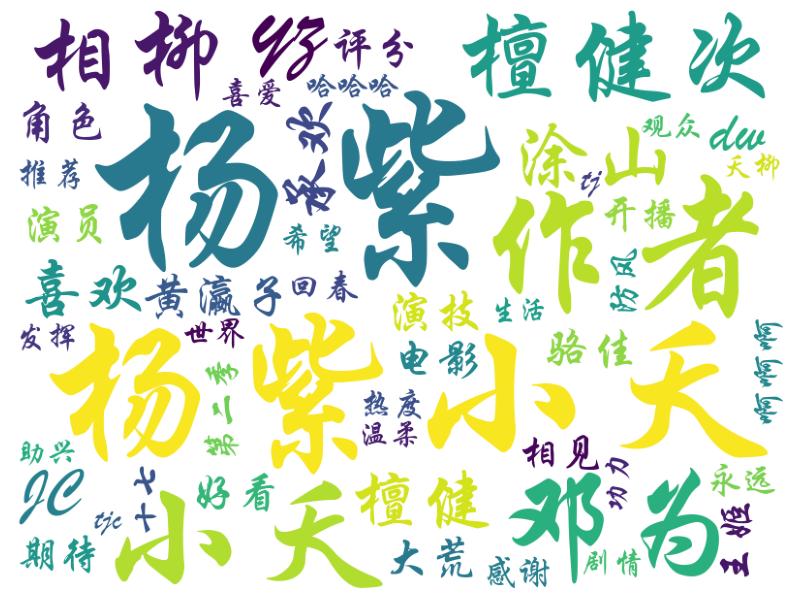

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 生成词云图
wordcloud = WordCloud(background_color="white", width=800, height=600, font_path='/content/sample_data/STXINGKA.TTF')
wordcloud.generate_from_frequencies(dict(wordsDict_seq[:50]))

# 显示词云图
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()